In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

#### Question 4

 $$ X \sim \begin{cases} \text{Normal}(\mu, 0.5^2) & \text{with probability } ~ 99\% \\
\text{Cauchy} & \text{with probability } ~ 1\% \end{cases} $$

Prior hypothesis: $\mu \sim \text{Normal}(0, 5^2)$

In [2]:
data = [4.3, 2.8, 3.9, 4.1, 9, 4.5, 3.3]
data = np.array(object=data)

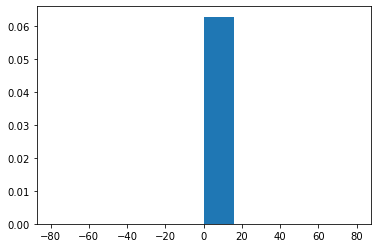

In [3]:
# never use ϕ and φ together because python confiuses them and treats them as the same letter
ϕ = scipy.stats.norm.pdf
ψ = scipy.stats.cauchy.pdf
μsample = np.random.normal(loc=0, scale=25, size=1000)
X = np.column_stack([.99*ϕ(x=pt, loc=μsample, scale=0.5**2) + .01*ψ(x=pt) for pt in data])
prx = np.prod(X, axis=1)  # take products along each row
w = prx/np.sum(prx)

fig, ax = plt.subplots()
ax.hist(μsample, weights=w, density=True)
plt.show()

Avoid underflow by taking log likelyhood

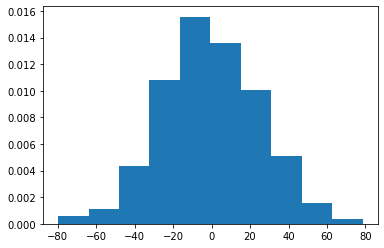

In [4]:
# never use ϕ and φ together because python confiuses them and treats them as the same letter
ϕ = scipy.stats.norm.pdf
ψ = scipy.stats.cauchy.pdf
μsample = np.random.normal(loc=0, scale=25, size=1000)
X = np.column_stack([np.log(.99*ϕ(x=pt, loc=μsample, scale=0.5**2) + .01*ψ(x=pt)) for pt in data])
prx = np.sum(X, axis=1)  # take sums along each row
w = prx/np.sum(prx)

fig, ax = plt.subplots()
ax.hist(μsample, weights=w, density=True)
plt.show()

### Correct version summarised here below

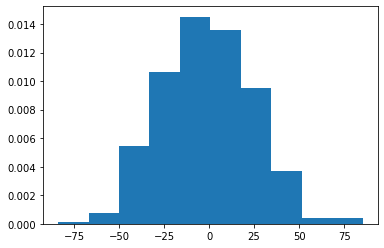

In [5]:
data = [4.3, 2.8, 3.9, 4.1, 9, 4.5, 3.3]
data = np.array(object=data)

# never use ϕ and φ together because python confiuses them and treats them as the same letter
ϕ = scipy.stats.norm.pdf
ψ = scipy.stats.cauchy.pdf
μsample = np.random.normal(loc=0, scale=25, size=1000)
X = np.column_stack([np.log(.99*ϕ(x=pt, loc=μsample, scale=0.5**2) + .01*ψ(x=pt)) for pt in data])
prx = np.sum(X, axis=1)  # take sums along each row
w = np.exp(prx)
w = prx/np.sum(prx)

fig, ax = plt.subplots()
ax.hist(μsample, weights=w, density=True)
plt.show()

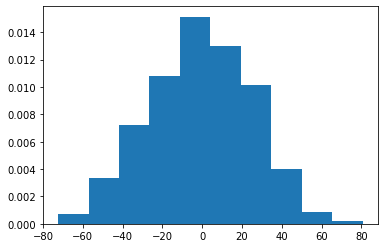

In [7]:
# Another method
data = [4.3, 2.8, 3.9, 4.1, 9, 4.5, 3.3]
data = np.array(object=data)

ϕ = scipy.stats.norm.pdf
ψ = scipy.stats.cauchy.pdf
μsample = np.random.normal(loc=0, scale=25, size=1000)
prx=np.array(np.log([np.prod(.99*ϕ(x=data, loc=μ, scale=0.25) + 0.01*ψ(x=data)) for μ in μsample]))
w = np.exp(prx)
w = prx/np.sum(prx)

fig, ax = plt.subplots()
ax.hist(μsample, weights=w, density=True)
plt.show()

Aside: plot of Normal and Cauchy distriutions

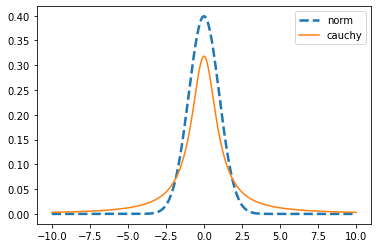

In [8]:
ϕ = scipy.stats.norm.pdf
ψ = scipy.stats.cauchy.pdf
x = np.linspace(-10, 10, 10000)
fig, ax = plt.subplots()
ax.plot(x, ϕ(x), linewidth=2.5, linestyle='dashed', label='norm')
ax.plot(x, ψ(x), label='cauchy')
plt.legend(loc='best')
plt.show()

#### Question 5

In [10]:
import pandas as pd

Let $Y=\text{temp}$ and $y = \alpha + \beta_1 \sin(2\pi t) + \beta_2\cos(2\pi t) + \gamma(t - 2000) + \epsilon$ where $ \epsilon \sim N(0,\sigma^2)$ , so that <br><br> $$ Y \sim N(\alpha + \beta_1 \sin(2\pi t) + \beta_2\cos(2\pi t) + \gamma(t - 2000), \sigma^2)$$

We choose a distribution to generate the unknown parameters. I don't know many distributions at this stage so I might as well assume normal distributions with the same noise parameters (at least for the purspose of the exercise, this is good enough). We start by assuming $\sigma^2$ to be known, with the further option of exploring the case where it comes from a distribution later on.

In [11]:
# import the dataset
climate = pd.read_csv('climate.csv')
climate = climate.loc[climate.station == 'Cambridge']
t = climate.yyyy + (climate.mm - 1)/12
temp = .5*(climate.tmax + climate.tmin)

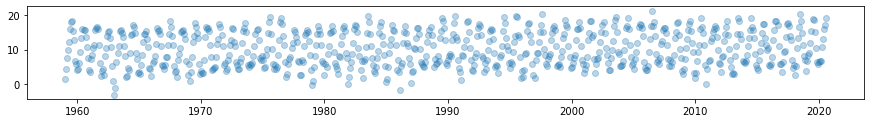

In [12]:
fig, ax = plt.subplots(figsize=(15, 1.7))
ax.scatter(t, temp, alpha=.3)
plt.show()

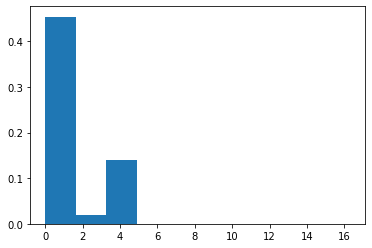

In [14]:
π = np.pi
m = len(t)
α = np.random.uniform(.7,1,size=m)
β1 = np.random.uniform(.7, 1,size=m)
β2 = np.random.uniform(.7, 1, size=m)
γ = np.random.exponential(scale=3,size=m)
μ = α + β1*np.sin(2*π*t) + β2*np.cos(2*π*t) + γ*(t - 2000)

#loglik = np.array([np.prod(scipy.stats.norm.pdf(temp, loc=μval, scale=1)) for μval in μ])
# this doesn't work computationally. There are wildly large values in μ, on which the pdf evaluates to zero.
# we then basically take the log of zero --> -inf. The solution is to hard-code the pdf
logpry = np.array([np.sum(scipy.stats.norm.logpdf(temp, loc=val, scale=3)) for val in μ])

w = np.exp(logpry - max(logpry))
w = w/np.sum(w)


fig, ax = plt.subplots()
ax.hist(γ, weights=w, density=True)
plt.show()


In [15]:
i = np.argsort(γ)
γ, w = γ[i], w[i]
F = np.cumsum(w)
lo, hi = γ[F<.025][-1], γ[F>.975][0]
lo, hi

(0.5358353737459638, 4.105205569907449)

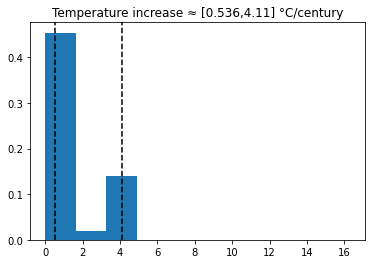

In [16]:
# Plot a histogram of the posterior density.
fig,ax = plt.subplots()
ax.hist(γ, weights=w, density=True)


ax.axvline(x=lo, linestyle='--', color='black')
ax.axvline(x=hi, linestyle='--', color='black')
ax.set_title(f"Temperature increase ≈ [{lo:.3},{hi:.3}] °C/century")

plt.show()